In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy

# File to Load
# Note that we are using sorted and unique data now
Colorado_Crime_Data_File = "Resources/COcrime.csv"

crime_data = pd.read_csv(Colorado_Crime_Data_File)


In [2]:
# Display size and header of csv file read
crime_data_count = len(crime_data)
print("Crime data record count: ", crime_data_count)
print("Crime data information:")
crime_data.head()

Crime data record count:  265
Crime data information:


,key,id,name,type,variable,value,year,crime_type,place_name
0,1600000US0816000--2006--Property crime--rate,1600000US0816000,"Colorado Springs, Colorado",place,rate,4797.150796,2006,Property crime,"Colorado Springs, CO"
1,1600000US0816000--2008--All Crimes--count,1600000US0816000,"Colorado Springs, Colorado",place,count,36240.000000,2008,All Crimes,"Colorado Springs, CO"
2,1600000US0816000--2012--Motor vehicle theft--rate,1600000US0816000,"Colorado Springs, Colorado",place,rate,416.852693,2012,Motor vehicle theft,"Colorado Springs, CO"
3,1600000US0816000--2008--Forcible rape--rate,1600000US0816000,"Colorado Springs, Colorado",place,rate,88.529954,2008,Forcible rape,"Colorado Springs, CO"
4,1600000US0816000--2013--Property crime--count,1600000US0816000,"Colorado Springs, Colorado",place,count,18175.000000,2013,Property crime,"Colorado Springs, CO"


In [3]:
# Make a dataframe with just the year, type of crime, and rate information
#
# This data set has both RATE and COUNT so selecting only rate will decrese number of records
#
# Information on selcting subset of data
# https://thispointer.com/python-pandas-select-rows-in-dataframe-by-conditions-on-multiple-columns/

rate_info = pd.DataFrame(crime_data[crime_data['variable'] == 'rate'],  columns = ['year', 'crime_type', 'value'])
crime_data_count = len(rate_info)
print('rate_info type= ', type(rate_info))
print('rate_info.head()= \n')
print(rate_info.head())
print("\nrecord count= ", crime_data_count)

rate_info type=  <class 'pandas.core.frame.DataFrame'>
rate_info.head()= 

   year           crime_type        value
0  2006       Property crime  4797.150796
2  2012  Motor vehicle theft   416.852693
3  2008        Forcible rape    88.529954
5  2013  Motor vehicle theft   442.092326
6  2013        Violent crime   434.066791

record count=  133


In [4]:
# In examining the data and sending through a sort we see that there
# is at least one duplicate entry for year 2015. Drop duplicate entries
# to clean up data.
#
# Information on removing duplicates
#https://stackoverflow.com/questions/23667369/drop-all-duplicate-rows-in-python-pandas
# https://jamesrledoux.com/code/drop_duplicates

rate_info = rate_info.drop_duplicates()
crime_data_count = len(rate_info)
print("Duplicates dropped")
print('rate_info type= ', type(rate_info))
print('rate_info.head()= \n')
print(rate_info.head())
print("\nrecord count= ", crime_data_count)

Duplicates dropped
rate_info type=  <class 'pandas.core.frame.DataFrame'>
rate_info.head()= 

   year           crime_type        value
0  2006       Property crime  4797.150796
2  2012  Motor vehicle theft   416.852693
3  2008        Forcible rape    88.529954
5  2013  Motor vehicle theft   442.092326
6  2013        Violent crime   434.066791

record count=  122


In [5]:
# Examine the crime type information

crime_by_type = rate_info['crime_type'].value_counts()
print("crime_by_type type= ", type(crime_by_type))
print("\ncrime_type= \n")
print(crime_by_type)

crime_by_type type=  <class 'pandas.core.series.Series'>

crime_type= 

Motor vehicle theft                     11
Arson                                   11
Robbery                                 11
Murder and nonnegligent manslaughter    11
Aggravated assault                      11
Larceny                                 11
Property crime                          11
All Crimes                              11
Burglary                                11
Violent crime                           11
Forcible rape                            7
Rape (revised definition)                4
Rape (legacy definition)                 1
Name: crime_type, dtype: int64


In [6]:
# Examining the data file shows that "Rape (legacy definition)" has a rate of 0
# and that the rate values of "Forcible rape" and "Rape (revised definition)"
# are similar. It looks as if in 2013 "Forible rape" was changed to "Rape
# (revised definition)".
#
# Clean up the data for plotting by removing the single entry for "Rape (legacy definition)"
# and combining both "Forcible rape" and "Rape (revised deiniton)" into a single
# entry called "Rape".

# Information on deleting rows:
# https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

rate_info.drop(rate_info.loc[crime_data['crime_type']=='Rape (legacy definition)'].index, inplace=True)
crime_data_count = len(rate_info)
print("Removed Rape (legacy definition)\n")
print('rate_info type= ', type(rate_info))
print('rate_info.head()= \n')
print(rate_info.head())
print("\nrecord count= ", crime_data_count)

Removed Rape (legacy definition)

rate_info type=  <class 'pandas.core.frame.DataFrame'>
rate_info.head()= 

   year           crime_type        value
0  2006       Property crime  4797.150796
2  2012  Motor vehicle theft   416.852693
3  2008        Forcible rape    88.529954
5  2013  Motor vehicle theft   442.092326
6  2013        Violent crime   434.066791

record count=  121


In [7]:
# Next step is to convert both "Forcible rape" and "Rape (revised definition)"
# into single entry "Rape"

# Also rename "Murder and nonnegligent manslaughter" to "Murder-Manslaughter"
# to save some space in printing

# Information on replacing cell entries in a dataframe
# https://stackoverflow.com/questions/18548662/rename-elements-in-a-column-of-a-data-frame-using-pandas
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
# https://www.geeksforgeeks.org/python-pandas-dataframe-replace/
# https://stackoverflow.com/questions/17142304/replace-string-value-in-entire-dataframe

rate_info = rate_info.replace(to_replace =["Forcible rape", "Rape (revised definition)"],  
                            value ="Rape")
rate_info = rate_info.replace(to_replace =["Murder and nonnegligent manslaughter"],
                              value="Murder-Manslaughter")


crime_data_count = len(rate_info)
print('rate_info.head()= \n')
print(rate_info.head())
print("\nrecord count= ", crime_data_count)

rate_info.head()= 

   year           crime_type        value
0  2006       Property crime  4797.150796
2  2012  Motor vehicle theft   416.852693
3  2008                 Rape    88.529954
5  2013  Motor vehicle theft   442.092326
6  2013        Violent crime   434.066791

record count=  121


In [8]:
# The values are wildly different. The output in previous cell
# shows values from 5 to 3560. This will not plot on something with
# the same scale. Get the average of each crime type to see what
# the ranges of values are. May want tyo plot some of these together
# or normalize to see trends.

crime_average = rate_info.groupby(['crime_type']).mean()

# The average of year value now has no meaning so drop that column
# https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe

crime_average.drop('year', axis=1, inplace=True)
print("Average crime rates\n")
print(crime_average)

Average crime rates

                           value
crime_type                      
Aggravated assault    279.608368
All Crimes           9045.558619
Arson                  24.500011
Burglary              776.267789
Larceny              2877.718708
Motor vehicle theft   371.829530
Murder-Manslaughter     5.250562
Property crime       4025.816027
Rape                   82.196719
Robbery               117.657628
Violent crime         484.713277


In [9]:
# Experiment with a pivot table
# Appears we want "pivot" instead of "pivot_table"
#
# Document on pivot (most useful), followed by other docs
# https://kite.com/blog/python/pandas-pivot-table/
# https://pbpython.com/pandas-pivot-table-explained.html
# https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/

# https://stackoverflow.com/questions/49188960/how-to-show-all-of-columns-name-on-pandas-dataframe/49189503


#crime_by_year = pd.pivot_table(rate_info, index=['year'])
#crime_by_year = rate_info.pivot(index='year', columns='crime_type', values='value')
crime_by_year = rate_info.pivot_table(index='year', columns='crime_type', values='value')

rows = len(crime_by_year)
print("crime_by_year = ", type(crime_by_year))
print("\ncrime_by_year rows= ",  rows)
print("index name = ", crime_by_year.index.name)
print("Columns = ", crime_by_year.columns.values)
print("crime_by_year =\n")
#print(crime_by_year)
crime_by_year

crime_by_year =  <class 'pandas.core.frame.DataFrame'>

crime_by_year rows=  11
index name =  year
Columns =  ['Aggravated assault' 'All Crimes' 'Arson' 'Burglary' 'Larceny'
 'Motor vehicle theft' 'Murder-Manslaughter' 'Property crime' 'Rape'
 'Robbery' 'Violent crime']
crime_by_year =



crime_type,Aggravated assault,All Crimes,Arson,Burglary,Larceny,Motor vehicle theft,Murder-Manslaughter,Property crime,Rape,Robbery,Violent crime
year,,,,,,,,,,,
2006,336.246407,10763.335080,30.519603,888.253137,3434.118793,474.778866,3.980818,4797.150796,66.612351,162.417365,569.256941
2007,306.058079,9940.071422,29.135660,849.745531,3177.658028,397.474553,7.217090,4424.878111,76.180395,141.134206,530.589770
2008,296.509277,9577.091091,28.541000,899.041498,3049.922966,297.037814,6.342444,4246.002278,88.529954,136.891092,528.272767
2009,269.902845,8336.860661,25.147774,822.904892,2578.767311,264.176124,3.734818,3665.848327,85.651825,130.718629,490.008117
2010,274.450471,9450.445605,25.132827,867.585188,3029.510965,323.710812,5.026565,4220.806965,80.173718,132.198670,491.849424
2011,252.785121,8395.251133,25.254909,784.318354,2684.809290,275.679758,6.136707,3744.807402,75.292674,105.976208,440.190710
2012,247.289417,9209.159656,17.580913,842.264514,2881.419057,416.852693,4.163900,4140.536264,82.815352,120.984439,455.253107
2013,247.415778,9217.441551,14.216662,854.375522,2871.077806,442.092326,5.961826,4167.545654,84.841370,95.847818,434.066791
2014,270.368065,8272.858238,21.126017,620.071064,2677.610243,369.930037,4.494897,3667.611344,92.594882,90.796923,458.254766


In [10]:
# The pivot table sets the dataframe index as "year".
# Plotting I tried wants the X axis value as a column.
# this URL gives hint of using reindex
#
# https://stackoverflow.com/questions/20084487/use-index-in-pandas-to-plot-data

crime_by_year = crime_by_year.reset_index()

rows = len(crime_by_year)
print("crime_by_year = ", type(crime_by_year))
print("\ncrime_by_year rows= ",  rows)
print("index name = ", crime_by_year.index.name)
print("Columns = ", crime_by_year.columns.values)
print("crime_by_year =\n")
#print(crime_by_year)
crime_by_year

crime_by_year =  <class 'pandas.core.frame.DataFrame'>

crime_by_year rows=  11
index name =  None
Columns =  ['year' 'Aggravated assault' 'All Crimes' 'Arson' 'Burglary' 'Larceny'
 'Motor vehicle theft' 'Murder-Manslaughter' 'Property crime' 'Rape'
 'Robbery' 'Violent crime']
crime_by_year =



crime_type,year,Aggravated assault,All Crimes,Arson,Burglary,Larceny,Motor vehicle theft,Murder-Manslaughter,Property crime,Rape,Robbery,Violent crime
0,2006,336.246407,10763.335080,30.519603,888.253137,3434.118793,474.778866,3.980818,4797.150796,66.612351,162.417365,569.256941
1,2007,306.058079,9940.071422,29.135660,849.745531,3177.658028,397.474553,7.217090,4424.878111,76.180395,141.134206,530.589770
2,2008,296.509277,9577.091091,28.541000,899.041498,3049.922966,297.037814,6.342444,4246.002278,88.529954,136.891092,528.272767
3,2009,269.902845,8336.860661,25.147774,822.904892,2578.767311,264.176124,3.734818,3665.848327,85.651825,130.718629,490.008117
4,2010,274.450471,9450.445605,25.132827,867.585188,3029.510965,323.710812,5.026565,4220.806965,80.173718,132.198670,491.849424
5,2011,252.785121,8395.251133,25.254909,784.318354,2684.809290,275.679758,6.136707,3744.807402,75.292674,105.976208,440.190710
6,2012,247.289417,9209.159656,17.580913,842.264514,2881.419057,416.852693,4.163900,4140.536264,82.815352,120.984439,455.253107
7,2013,247.415778,9217.441551,14.216662,854.375522,2871.077806,442.092326,5.961826,4167.545654,84.841370,95.847818,434.066791
8,2014,270.368065,8272.858238,21.126017,620.071064,2677.610243,369.930037,4.494897,3667.611344,92.594882,90.796923,458.254766
9,2015,274.308702,8200.526071,27.850843,533.586791,2732.698216,381.733383,5.525961,3648.018390,75.374108,83.110453,438.319224


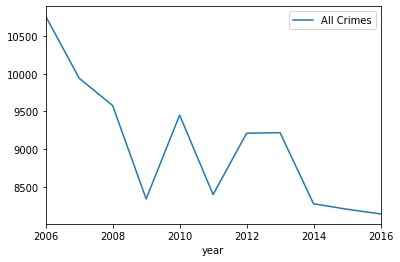

In [11]:
# Useful plotting information
# http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
# https://dfrieds.com/data-visualizations/bar-plot-python-pandas
# https://stackoverflow.com/questions/47775220/how-to-plot-two-columns-of-single-dataframe-on-y-axis-of-linegraph

crime_by_year.plot(x='year', y='All Crimes')

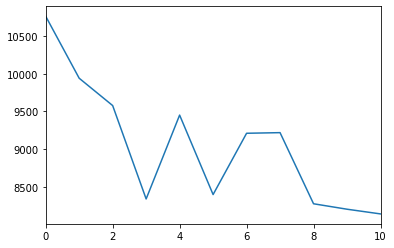

In [12]:
# Alternate plotting method
# This does not show year on X-axis

crime_by_year['All Crimes'].plot()

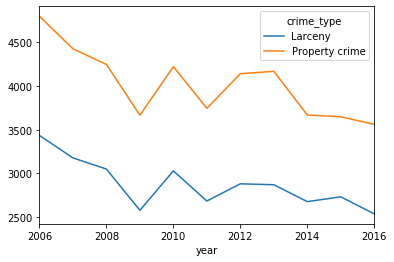

In [13]:
# Plot two items with reasonably similar values

crime_by_year.plot(x="year", y=["Larceny", "Property crime"])
plt.show()